In [4]:
import pandas as pd
from apyori import apriori
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('C:\\Users\\otavi\\OneDrive\\Área de Trabalho\\attMineracaoOtv\\atividade_mineracao\\csv\\compras (1).csv')

In [6]:
#Dropando a coluna cliente
df = df.drop('cliente', axis=1)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,limão,peito de peru,manga,cerveja,picanha,carvão,sal,linguiça,mel,geleia,cereal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,salsicha,cerveja,picanha,catchup,geleia,cebola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,queijo,frutas,chá,alface,granola,feijão,farinha de trigo,suco de laranja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pimenta,sardinha enlatada,barra de cereal,molho de tomate,gelatina,vinho branco,pão,tempero pronto,vinho tinto,presunto,arroz,feijão,NaN,NaN,NaN,NaN,NaN,NaN
4,detergente,filé de frango,arroz,feijão,limão,papel higiênico,presunto,farinha de trigo,salada,alface,cenoura,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Aplicando one-hot encoding
df_encoded = pd.get_dummies(df)


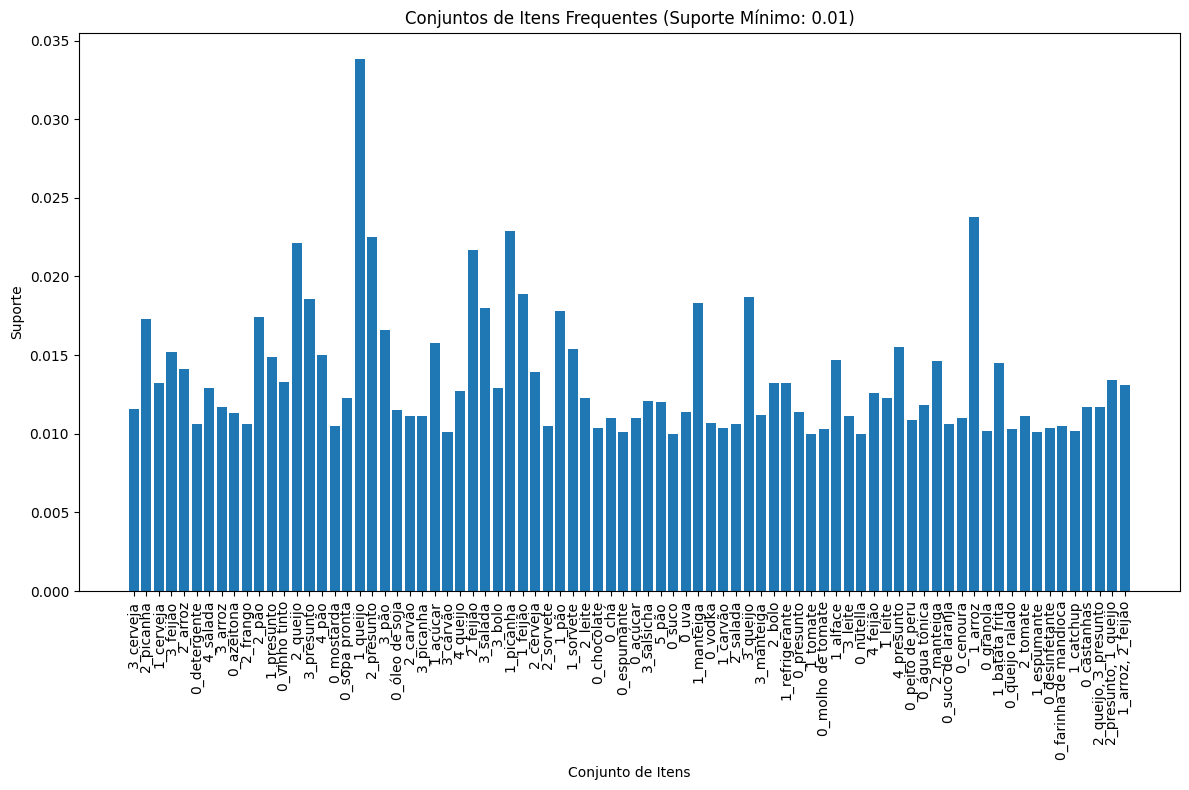

In [8]:
# Ajustar o suporte mínimo para 0.05 (5%)
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

plt.figure(figsize=(12, 8))
plt.bar(frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)), frequent_itemsets['support'])
plt.xticks(rotation=90)
plt.xlabel('Conjunto de Itens')
plt.ylabel('Suporte')
plt.title('Conjuntos de Itens Frequentes (Suporte Mínimo: 0.01)')
plt.tight_layout()
plt.show()

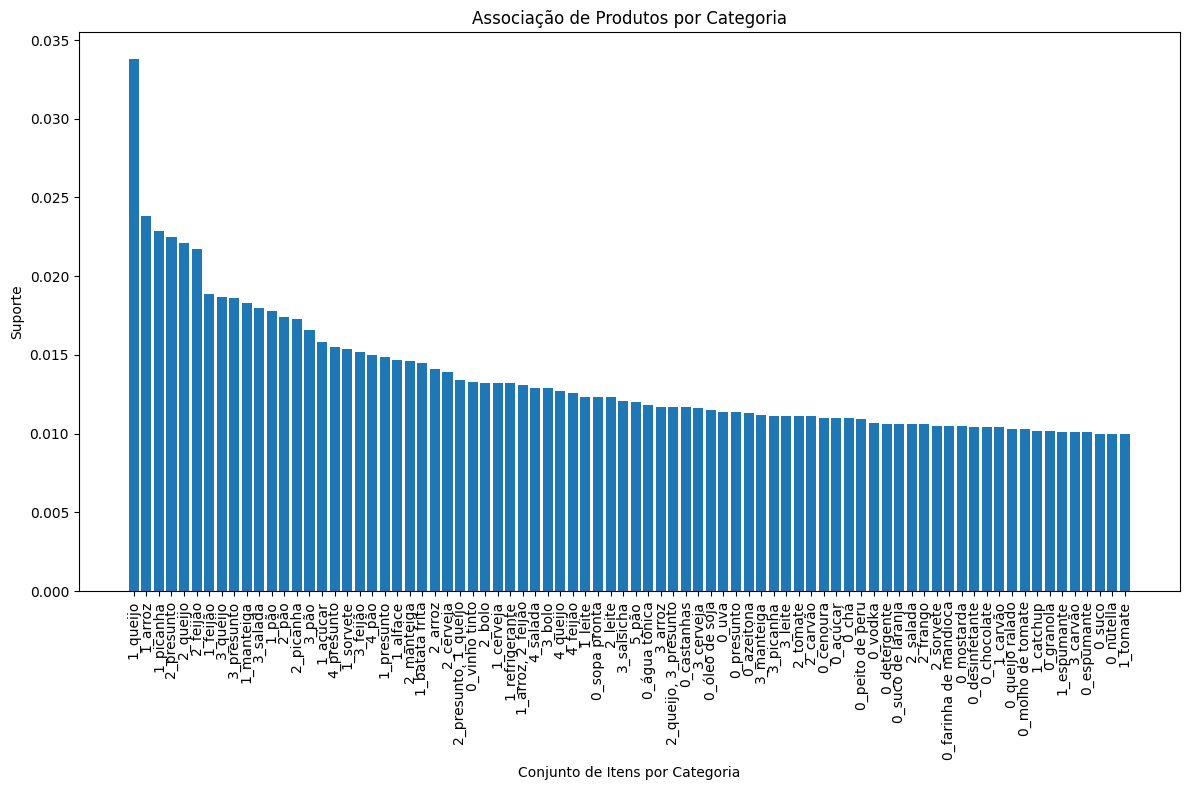

In [9]:
# Ajustar o suporte mínimo para 0.05 (5%)
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Ordenar os conjuntos de itens frequentes por suporte
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Plotar o gráfico de barras verticais
plt.figure(figsize=(12, 8))
plt.bar(frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)), frequent_itemsets['support'])
plt.xticks(rotation=90)
plt.xlabel('Conjunto de Itens por Categoria')
plt.ylabel('Suporte')
plt.title('Associação de Produtos por Categoria')
plt.tight_layout()
plt.show()